# Data Acquisition 

In [1]:
# import pandas and numpy

import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt

In [2]:
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

kaggle/input/black-friday/train.csv


In [3]:
data = 'kaggle/input/black-friday/train.csv'

df = pd.read_csv(data)

# Data Information

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(550068, 12)

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.9+ MB


# Data Cleaning

The data set contains some empty cells. Empty cells can potentially give a wrong result when analyze data. We replace empty cells with zero value.

In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
df.fillna(0, inplace = True)

In [11]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# Data Analysis using statistical methods

Find the Total Number of unique products sales on black friday.

In [12]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

# Data Analysis using conditional filtering with more than one condition

Find the customers details from city A with purchase greater than 23950.

In [13]:
df[df.eval("Purchase > 23950 & City_Category == 'A'")]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
87440,1001474,P00052842,M,26-35,4,A,2,1,10,15.0,0.0,23961
229329,1005367,P00085342,M,18-25,4,A,1,0,10,13.0,0.0,23958
349658,1005848,P00119342,M,51-55,20,A,0,1,10,13.0,0.0,23960


Find all the female customers details who buy product from all three categories and above 14.

In [14]:
df.query("Product_Category_1 > 14 & Product_Category_2 > 14 & Product_Category_3 > 14 & Gender == 'F'")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
2599,1000415,P00209642,F,36-45,0,A,2,1,15,16.0,17.0,17034
85051,1001140,P00209642,F,46-50,2,B,2,1,15,16.0,17.0,21200
95598,1002807,P00209642,F,36-45,11,B,2,1,15,16.0,17.0,4923
155548,1006037,P00209642,F,46-50,1,C,4+,0,15,16.0,17.0,16725
159068,1000602,P00209642,F,55+,6,C,2,0,15,16.0,17.0,21060
190483,1005433,P00209642,F,36-45,17,B,3,1,15,16.0,17.0,4669
193880,1005947,P00209642,F,46-50,16,B,1,1,15,16.0,17.0,16791
215379,1003292,P00209642,F,51-55,6,B,3,0,15,16.0,17.0,13193
266799,1005090,P00209642,F,36-45,19,B,3,1,15,16.0,17.0,20808
271574,1005844,P00209642,F,0-17,10,C,1,0,15,16.0,17.0,17337


# Data Analysis using group the data by column(s)

Find the total sales of products by female and male on black friday.

In [15]:
df1=df.copy()

df1.groupby('Gender')['Purchase'].agg([np.sum])

,sum
Gender,
F,1186232642
M,3909580100


# Data Analysis using sorting the data in ascending/ descending order

Sort the customers data with respect to purchase value from highest to lowest. 

In [16]:
df2=df.copy()

df2.sort_values(by='Purchase', ascending=False)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
370891,1003160,P00052842,M,26-35,17,C,3,0,10,15.0,0.0,23961
93016,1002272,P00052842,M,26-35,0,C,1,0,10,15.0,0.0,23961
87440,1001474,P00052842,M,26-35,4,A,2,1,10,15.0,0.0,23961
503697,1005596,P00117642,M,36-45,12,B,1,0,10,16.0,0.0,23960
321782,1001577,P00052842,M,55+,0,C,1,1,10,15.0,0.0,23960
...,...,...,...,...,...,...,...,...,...,...,...,...
546379,1000671,P00370853,M,18-25,4,C,0,0,19,0.0,0.0,12
546185,1000391,P00370293,M,46-50,11,C,2,1,19,0.0,0.0,12
547032,1001649,P00370293,M,18-25,19,C,2,1,19,0.0,0.0,12
546181,1000387,P00370293,F,36-45,7,C,0,0,19,0.0,0.0,12


# Data Analysis using combination of sorting, condition filter and/or grouping

Find the total sales by each age group and list them from highest to lowest by purchase value.

In [17]:
df3=df.copy()

df3.groupby('Age')['Purchase'].agg([np.sum]).sort_values("sum", ascending=False)

,sum
Age,
26-35,2031770578
36-45,1026569884
18-25,913848675
46-50,420843403
51-55,367099644
55+,200767375
0-17,134913183


Find the total sales by new city residents for each city and list them from highest to lowest by purchase value.

In [18]:
df4=df.copy()

df4.query("Stay_In_Current_City_Years == '0'").groupby('City_Category')['Purchase'].agg([np.sum]).sort_values("sum", ascending=False)


,sum
City_Category,
B,255389454
A,217277717
C,210312058


# Visualize data using a chart with proper headings and legends

Display the total sales by each age group using a bar graph.

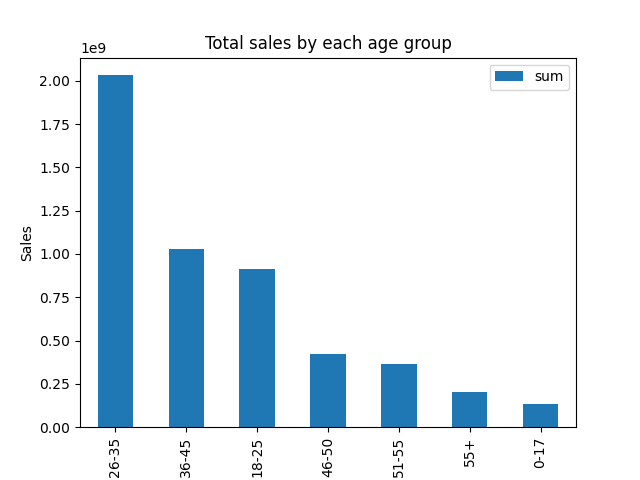

In [19]:
df4=df.copy()

df4 = df4.groupby('Age')['Purchase'].agg([np.sum]).sort_values("sum", ascending=False)

df4.plot(kind='bar', xlabel='Age Group', ylabel='Sales', title='Total sales by each age group')

plt.show()

Display the total sales by each city using a pie chart.

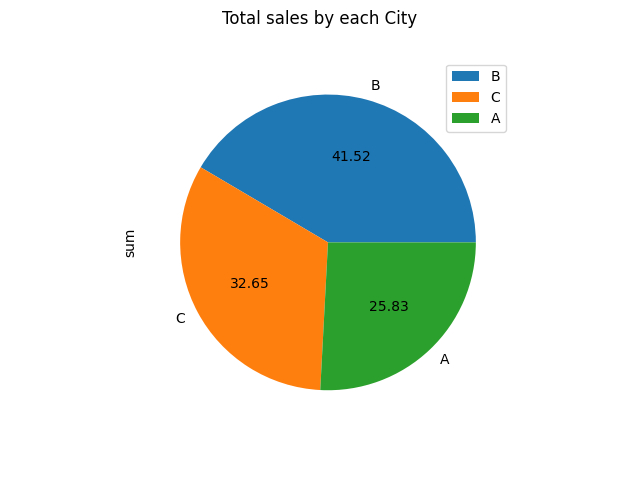

In [20]:
df5=df.copy()

df5 = df5.groupby('City_Category')['Purchase'].agg([np.sum]).sort_values("sum", ascending=False)

df5.plot(kind='pie', subplots=True, autopct='%.2f', title='Total sales by each City')

plt.show()

Display the total sales by Gender Type using a horizontal graph.

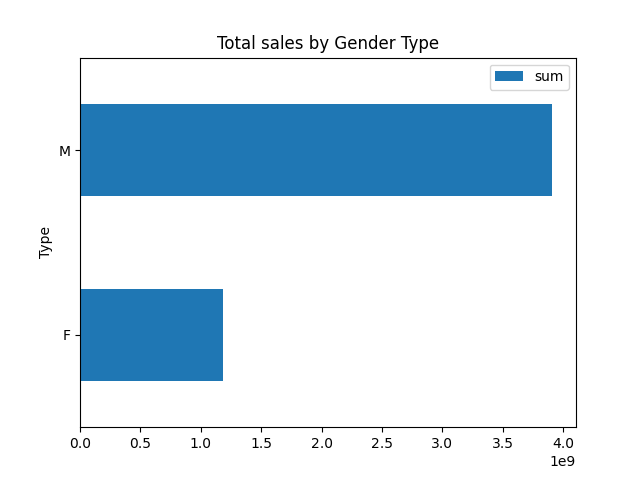

In [21]:
df6 = df.groupby('Gender')['Purchase'].agg([np.sum])

df6.plot(kind='barh', xlabel='Type', ylabel='Type', legend=["Male","Female"], title='Total sales by Gender Type')

plt.show()